In [1]:
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import sys
sys.path.insert(0, '../utils')
import data_utils

sys.path.insert(0, '../models')
import log_reg_word_embeddings

In [3]:
df_train = data_utils.load_data_set('../data/train/train.csv')
df_train_x = df_train[['head.word', 'tail.word', 'sentence']]
df_train_y = df_train['relation']

In [4]:
model = log_reg_word_embeddings.LogRegWordEmbeddings()

In [8]:
model.fit(df_train_x, df_train_y)

Tokenizing sentences...
0    [she, also, oversaw, refinancing, state, super...
1    [more, 2, 5, million, cubic, yards, contaminat...
2    [the, onondaga, nation, 1, 500, members, feder...
3    [he, born, istanbul, raised, eastern, city, ad...
4    [by, end, recent, tour, rollins, met, soldiers...
Name: sentence, dtype: object
Averaging word embeddings...
0    [-0.024940285714285717, -0.014328357142857137,...
1    [0.022366650000000002, 0.060093550000000016, -...
2    [-0.02160072727272727, 0.10642886363636364, -0...
3    [0.012861874999999998, 0.0178651875, -0.102017...
4    [0.07083508108108107, 0.03429608108108108, -0....
Name: sentence, dtype: object
Shape of transformed input: (522517, 50)
Fitting label encoder...
['/broadcast/content/location' '/broadcast/producer/location'
 '/business/business_location/parent_company' '/business/company/advisors'
 '/business/company/founders' '/business/company/industry'
 '/business/company/locations' '/business/company/major_shareholders'
 '/bu

In [12]:
model.predict(df_train_x.head())

Tokenizing sentences...
0    [she, also, oversaw, refinancing, state, super...
1    [more, 2, 5, million, cubic, yards, contaminat...
2    [the, onondaga, nation, 1, 500, members, feder...
3    [he, born, istanbul, raised, eastern, city, ad...
4    [by, end, recent, tour, rollins, met, soldiers...
Name: sentence, dtype: object
Averaging word embeddings...
0    [-0.024940285714285717, -0.014328357142857137,...
1    [0.022366650000000002, 0.060093550000000016, -...
2    [-0.02160072727272727, 0.10642886363636364, -0...
3    [0.012861874999999998, 0.0178651875, -0.102017...
4    [0.07083508108108107, 0.03429608108108108, -0....
Name: sentence, dtype: object
Shape of transformed input: (5, 50)


array(['NA', 'NA', 'NA', 'NA', 'NA'], dtype=object)

In [17]:
import pickle

save_dir = '../trained_models/log_reg_word_embeddings.pkl'
with open(save_dir, 'wb') as save_file:
    pickle.dump(model.model, save_file)

In [19]:
with open(save_dir, 'rb') as saved_file:
    loaded_model = pickle.load(saved_file)

In [22]:
loaded_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=4, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
df_test = data_utils.load_data_set('../data/test/test.csv')
df_test_x = df_test[['head.word', 'tail.word', 'sentence']]
df_test_y = df_test['relation']

In [71]:
predictions = model.predict(df_test_x)

Tokenizing sentences...
0    [the, little, comedy, mannered, operetta, base...
1    [a, court, rome, acquitted, five, people, accu...
2    [there, also, performers, born, louisiana, inc...
3    [when, julian, resuello, mayor, san, carlos, c...
4    [a3, concern, raised, libya, deal, alex, salmo...
Name: sentence, dtype: object
Averaging word embeddings...
0    [-0.04764994117647058, 0.043827, -0.0100119411...
1    [0.046854531250000005, -0.0070380000000000035,...
2    [0.02044745454545455, 0.013675363636363645, -0...
3    [0.10651433333333332, -0.028786888888888893, 0...
4    [0.0343515, -0.01823760714285715, 0.0274138928...
Name: sentence, dtype: object
Shape of transformed input: (172446, 50)


In [73]:
from collections import Counter
Counter(predictions)

predicted_labels = predictions
gold_labels = df_test_y

Counter(gold_labels)

Counter({'NA': 168932,
         '/people/person/nationality': 420,
         '/location/location/contains': 2321,
         '/business/person/company': 110,
         '/location/country/capital': 101,
         '/people/person/place_lived': 236,
         '/location/neighborhood/neighborhood_of': 108,
         '/location/country/administrative_divisions': 210,
         '/business/company/founders': 6,
         '/people/deceased_person/place_of_death': 2})

Counter({'/people/person/place_of_birth': 162,
         '/people/person/nationality': 723,
         '/people/person/place_lived': 450,
         '/location/location/contains': 2793,
         '/sports/sports_team/location': 10,
         '/business/person/company': 302,
         '/location/country/capital': 553,
         '/business/company/founders': 95,
         '/film/film/featured_film_locations': 2,
         '/location/administrative_division/country': 424,
         '/location/us_county/county_seat': 23,
         '/people/deceased_person/place_of_death': 68,
         '/business/company/place_founded': 20,
         '/location/country/languages_spoken': 3,
         '/location/neighborhood/neighborhood_of': 68,
         '/people/person/children': 30,
         '/film/film_location/featured_in_films': 2,
         '/people/ethnicity/geographic_distribution': 136,
         '/location/country/administrative_divisions': 424,
         '/location/us_state/capital': 39,
         '/business/compan

In [138]:
# Precision-Recall Curve

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import OneHotEncoder

combined_labels = np.append(df_test_y, [df_train_y]).reshape(-1, 1)

one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(combined_labels)

one_hot_encoded_gold_labels = one_hot_encoder.transform(df_test_y.values.reshape(-1, 1))
one_hot_encoded_gold_labels

one_hot_encoded_predicted_labels = one_hot_encoder.transform(predicted_labels.reshape(-1, 1))
one_hot_encoded_predicted_labels

precision, recall, threshold = precision_recall_curve(
    y_true=one_hot_encoded_gold_labels.reshape(-1, 1).toarray(),
    probas_pred=one_hot_encoded_predicted_labels.reshape(-1, 1).toarray(),
#     pos_label=1
)

average_precision = 

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

<172446x58 sparse matrix of type '<class 'numpy.float64'>'
	with 172446 stored elements in Compressed Sparse Row format>

<172446x58 sparse matrix of type '<class 'numpy.float64'>'
	with 172446 stored elements in Compressed Sparse Row format>

In [141]:
# Evaluation

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, average_precision_score

def compute_score(predicted_labels, gold_labels, labels, average='weighted'):
    accuracy = accuracy_score(gold_labels, predicted_labels)
    precision = precision_score(gold_labels, predicted_labels, average=average)
    recall = recall_score(gold_labels, predicted_labels, average=average)
    f1 = f1_score(gold_labels, predicted_labels, average=average)
    average_precision = average_precision_score(
        y_true=one_hot_encoded_gold_labels.toarray(),
        y_score=one_hot_encoded_predicted_labels.toarray(),
        average='micro'
    )

    return {
        'accuracy': accuracy,
        'precision': precision,
        'average_precision': average_precision,
        'recall': recall,
        'f1': f1
    }

compute_score(predicted_labels, gold_labels, labels=combined_labels)

/home/tony/source/relation-extraction/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tony/source/relation-extraction/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


{'accuracy': 0.9450378669264582,
 'precision': 0.9291780131403298,
 'average_precision': 0.8940441929089368,
 'recall': 0.9450378669264582,
 'f1': 0.9369602840198727}

In [134]:
print('average_precision: {}'.format(average_precision))

average_precision: 0.8940441929089368


Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

(0.0, 1.05)

(0.0, 1.0)

Text(0.5, 1.0, 'Precision-Recall curve: AP=0.89')

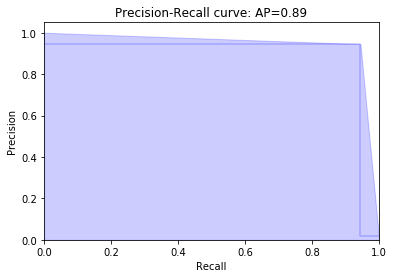

In [137]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))